<h2><strong> 1. 버트 모형 소개 </strong></h2>
<p> 버트 모형은 2018년 11월 구글이 공개한 인공지능(AI) 언어 모델로써 기존 자연어 모델의 성능을 가볍게 뛰어넘었으며, 일부 성능 평가에서는 인간보다 더 높은 성능을 기록한 모델입니다. <strong>BERT는 Bidirectional Encoder Representations from Transformers</strong>의 약자로 18년 10월 구글에 의해 논문이 공개되었습니다.<br>
버트 모형의 특징은 <strong>사전학습, 문맥학습, 파인튜닝</strong>을 들 수 있습니다.<br>
<br><strong>(사전학습)</strong> 위키피디아 같은 아주 큰 데이터들을 사용하여 '언어 이해' 모델을 사전학습(Pre-training)한다. 광범위한 데이터로 인간이 살아오면서 체득한 지식과 같이 다양한 데이터를 학습하게 됩니다.<br>
<strong>(문맥학습1)</strong> 문장 순서를 학습하여 다음에 나온 문장이 순서에 맞는 문장인지 학습합니다.<br><br>&nbsp;&nbsp;=>  문장1: 저 남자는 회사에 출근했다<br>&nbsp;&nbsp;=>  문장2: 회사에 출근하자마자 저 남자는 커피를 끓여 마셨다.<strong>    (순서가 맞음)</strong><br><br>&nbsp;&nbsp;=> 문장3: 저 여자는 퇴근하려 한다.<br>&nbsp;&nbsp;=> 문장4: 강아지는 예쁘다.<strong>    (순서가 틀린 문장)</strong><br><br><strong>(문맥학습2)</strong> 양방향으로 학습하여 가려진 단어를 맞춘다.<br>&nbsp;&nbsp;&nbsp;&nbsp;문장 : 저 남자는 (①)에 출근했다. 회사에 출근하자마자 저 남자는 (②)를 마셨다.<br>&nbsp;&nbsp;=> ① : 회사 ② : 커피<br><br><strong>(파인튜닝)</strong> 이미 사람처럼 광범위한 글을 학습한 인공지능을 기반으로 하여 새로운 과제를 해결하게 됩니다. 이미 기반 지식이 있기 때문에 새로운 것을 쉽고 빠르게 학습할 수 있습니다.<br>
본 실습에서는 네이버 영화 평가 댓글로 긍정 부정인지를 예측하는 버트 모형을 생성해 보겠습니다.</p>




<h2><strong>3. 버트 사전학습 모형 가져오기</strong></h2>

https://github.com/google-research/bert 에 접속하셔서 BERT-Base, Multilingual Cased: 104 languages, 12-layer, 768-hidden, 12-heads, 110M parameters 파일을 다운 받으시길 바랍니다.

![대체 텍스트](https://i.imgur.com/RlutYyW.png)

<p>사전 학습 모형을 다운 받으셨다면, Colab에서 활용하기 위해 구글 GDRIVE에 업로드 하시길 바랍니다.</p>

![대체 텍스트](https://i.imgur.com/uM97zAQ.png)



<p> 누구나 쉽게 실습할 수 있도록 구글 Colaboratory를 활용하였습니다<br> <u>런타임->런타임 유형 변경에서 GPU를 꼭 선택하시기 바랍니다.</u><br>
그리고 데이터는 구글 G드라이브에 넣어 두었습니다. 사정에 맞게 폴더 경로를 변경하시기 바랍니다.</p>


In [ ]:
# wget을 활용해서 bert 모델 다운로드 가능
import os
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

import zipfile
import shutil
         
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')
 
bert_zip.close()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree("bert/multi_cased_L-12_H-768_A-12", "bert")

--2020-06-30 06:10:43--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip.1’

multi_cased_L-12_H- 100%[===================>] 632.19M   156MB/s    in 4.2s    

2020-06-30 06:10:47 (151 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip.1’ saved [662903077/662903077]



<h2><strong>본격적으로 케라스와 버트를 활용하여 네이버 영화 댓글 감성 분석 예측을 시작하겠습니다.</strong></h2>


 #### 구글 드라이브와 Colab을 연동합니다



In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


- Colab에서 Bert 모형을 가지고 있는 폴더를 지정해줍니다  

- 파이썬 명령어 os.listdir(path)를 활용하여 폴더가 잘 있는지 확인하면서 진행합니다.

텐서플로우, 판다스, 넘파이, 케라스 등 필요한 모듈들을 임포트합니다

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

import pandas as pd
import numpy as np  
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers

import codecs
from tqdm import tqdm
import shutil

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import warnings
import tensorflow as tf
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

케라스에서 Bert 활용을 쉽게 만들어주는 모듈 keras-bert를 설치합니다<br>그리고 Adam optimizer의 수정판인 keras-radam 모듈을 임포트합니다.

In [ ]:
!pip install keras-bert
!pip install keras-radam

In [ ]:
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

In [ ]:
os.listdir('bert')

['bert_model.ckpt.data-00000-of-00001',
 'multi_cased_L-12_H-768_A-12',
 'bert_model.ckpt.meta',
 'bert_config.json',
 'vocab.txt',
 'bert_model.ckpt.index']

In [ ]:
train = pd.read_csv("/content/gdrive/Shared drives/BigData/origin_data/alldata.csv",index_col = None)
#test = pd.read_table("nsmc/"+"ratings_test.txt")

In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 16
EPOCHS=2
LR=1e-5

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
print(config_path)
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "text"
LABEL_COLUMN = "smishing"

bert/bert_config.json


In [ ]:
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
          token = token.replace("_","")
          token = "##" + token
        token_dict[token] = len(token_dict)

In [ ]:
class inherit_Tokenizer(Tokenizer):
  def _tokenize(self, text):
        if not self._cased:
            text = text
            
            text = text.lower()
        spaced = ''
        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' ' + ch + ' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [ ]:
tokenizer = inherit_Tokenizer(token_dict)

In [ ]:
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)

def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    
    
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)


    data_x, data_y = convert_data(data_df)

    return data_x, data_y

In [ ]:
text_train = train[:50000]
train_x, train_y = load_data(text_train)
#test_x, test_y = load_data(test)

100%|██████████| 50000/50000 [00:24<00:00, 2081.75it/s]


- 사전학습된 버트 모델의 인풋은 문장 토큰화가 숫자로 바뀐 것과, 앞문장인지 뒷문장인지 알려주는 문장 순서 벡터가 들어갑니다. 우리는 문장 하나를 가지고만 훈련할 것이므로 순서 벡터는 모두 0으로 통일합니다.

- 그리고 파인튜닝 시에는 문장 안에 일부 단어를 가리는 마스킹은 사용하지 않습니다.

**버트 모형에 들어갈 인풋은 토큰, 세그먼트, 포지션으로 구성됩니다.**  
버트에 인풋으로 들어가는 토큰은 문장을 토크나이징 한 후, 인덱스 번호를 매긴 것입니다.  
세그먼트는 예를 들어 문장이 두 개가 있다면, 앞의 문장과 뒤의 문장을 구분하는 것입니다.  
포지션 임베딩은 단순히 단어의 위치를 말합니다.

토큰, 세그먼트, 포지션을 인풋으로 버트 모형에 넣으면 기하학적인 문장 공간으로 임베딩이 됩니다.

![대체 텍스트](https://i.imgur.com/l9BTao3.png)

#### 이해가 안 가실 수 있는데, 버트 인풋을 문장으로 예를 들어 만들어 보겠습니다.
#### 인풋은 총 2개가 들어갑니다
- **(토큰)** 첫번째 인풋은 토큰화 된 것이 인덱싱되어 숫자로 변환된 것  

- **(세그멘트)** 두번째 인풋은 앞문장인지 뒷문장인지 알려주는 숫자들입니다. 이번 튜토리얼에서는 파인튜닝 과정이라 앞문장 뒷문장 구분을 안하기 때문에 모두 0으로 하였습니다.  

- **(포지션)** 단어 순서에 따라서 자동으로 부여됩니다.


In [ ]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data))):
        print(tokenizer.tokenize(data[i]))
        ids, segments = tokenizer.encode(data[i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def sentence_load_data(sentences):#sentence는 List로 받는다
           
    data_x = sentence_convert_data(sentences)

    return data_x

이해가 되셨는지요?  
구글 깃허브에서 다운받았던 사전학습된 모델을 colab으로 로드합니다.

In [ ]:
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)

모델의 구조를 확인합니다.  
총 12층의 트랜스포머 계층이 있음을 확인할 수 있습니다.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

가장 중요한 부분인데요, 사전학습 파일을 로드하여, 우리가 불러들였던 사전학습 모델을 변형해줍니다.  
  

input으로는 우리가 문장을 토큰화 하여 숫자로 변형시켜주었던 **토큰 벡터와**, 앞문장인지 뒷문장인지 알려주는 **세그멘트** 두 가지가 되겠습니다.  
  
즉 인풋은 inputs = modle.inputs[:2]로 정의하였습니다.  
  
  
그리고 output은 일단 사전학습 모델을 약간 잘라줍니다.(outputs=Dense(1)) 맨 위 3층을 잘라 낸다음에 잘라낸 부분에 긍정인지 부정인지 알려주는 **Dense(1)을 사전학습 모델에 애드온 시켜 줍니다.**  

Dense(1)은 아웃풋이 하나로, **문장이 긍정에 가까우면 0에 가까운 값**을, **부정에 가까우면 1에 가까운 값**을 출력해주는 레이어입니다.



그리고 사전 설치하였던 Radam을 활용하여 deep learning의 기울기 강하 훈련을 하도록 정해줍니다. 그 다음에 bert_model을 return해 줍니다.

In [ ]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                              name = 'real_output')(dense)



  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  
  return bert_model
  

**모델의 FLOW를 확인해 보도록 하겠습니다.**

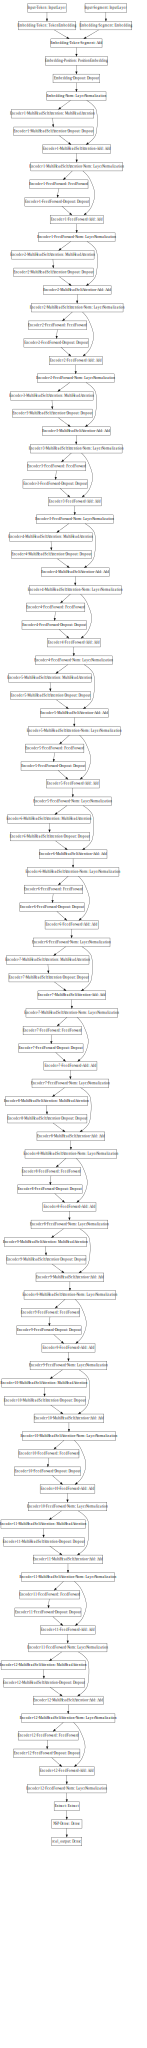

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))


bert_model을 get_bert_finetuning_model 함수로 불러들입니다.
이 다음에 bert_model.fit을 활용하여 버트 모형 파인튜닝을 시작하게 됩니다.
실시간으로 테스트 데이터에 대한 정확도를 알기 위해 validation_data = (test_x, test_y)로 정하였습니다.

**2 에포크 만에 정확도가 88.02%에 도달함을 알 수 있습니다.**  
  

만약에 ETRI에서 만든 한국어로 학습된 BERT 모형을 사용하면 정확도가 90%가 넘기도 합니다.(조만간 ETRI BERT를 활용하여 정확도 높이는 기법도 알려 드리겠습니다.)  
  

사실 아무 전처리 없이 네이버 감성분석의 정확도가 2 에포크 만에 88.02%가 나온 것은 상당히 고무적인 것입니다.  
  

BiLSTM 이나 어텐션 기법을 사용했을 시 보통 테스트셋에 대한 정확도가 86% 정도로 알려져 있습니다.

In [ ]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=2, batch_size=16, verbose = 1, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 875s 22ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 2/2
40000/40000 [==============================] - 864s 22ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0015 - val_accuracy: 0.9997


재사용을 위해 bert_model을 지드라이브에 저장해줍니다.

In [ ]:
path = '/content/gdrive/Shared drives/BigData/origin_data'
bert_model.save_weights(path+"/bert.h5")

버트 모형을 로드해줍니다. 이미 로드하였던 모델에 계수들만 살짝 얹혀 줍니다.

In [ ]:

bert_model = get_bert_finetuning_model(model)
bert_model.load_weights(path+"/bert.h5")

파인튜닝한 버트 모형에 test 데이터 셋을 넣어 평가해 봅니다.
사실 머신러닝에서는 정확도인 accuracy도 중요하지만, **F1 score**가 상당히 중요합니다.
  

긍정문장으로 판별된 문장이 진짜로 **긍정 문장에 속할 확률**  
  

부정문장으로 판별된 문장이 진짜로 **부정 문장에 속할 확률**  
 **이 두가지를 고려한 종합적인 성능이 F1 score입니다.**

한번 F1-score를 확인해 보겠습니다.


먼저 테스트 데이터를 버트 모형에 넣을 수 있도록 predict_convert_data 함수를 정의해줍니다. <br> 위에 정의한 convert_data 함수와 다른 점은, test 데이터이기 때문에 label은 고려하지 않는다는 점입니다

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    indices = []
    
    for i in data_df[DATA_COLUMN] :
        ids, segments = tokenizer.encode(i, max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def predict_load_data(x): #Pandas Dataframe을 인풋으로 받는다
    data_df = x
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)

    return data_x

In [ ]:
test = train[50000:200000]
test_set = predict_load_data(test)

In [ ]:
test_set

[array([[   101,   8863,  37388, ...,      0,      0,      0],
        [   101,  76294,  10686, ...,      0,      0,      0],
        [   101,  76294,  10686, ...,      0,      0,      0],
        ...,
        [   101,  15361,  10530, ...,   9960,  10459,    102],
        [   101,   8888, 118617, ...,      0,      0,      0],
        [   101,   9996, 119236, ...,      0,      0,      0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

테스트 셋으로 예측하기

In [ ]:
#예측
preds = bert_model.predict(test_set)

In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.00013536],
       [0.00013763],
       [0.00013795],
       ...,
       [0.00015804],
       [0.00013337],
       [0.00021955]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = test['smishing']
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    143637
         1.0       0.91      0.98      0.94      6363

    accuracy                           0.99    150000
   macro avg       0.95      0.99      0.97    150000
weighted avg       1.00      0.99      1.00    150000



F1 스코어와 Accuracy가 거의 비슷함을 알 수 있습니다. 훈련이 치우치지 않고 잘 됐음을 알 수 있습니다.

#### 한번 케라스의 장점을 살려 볼까요?
#### 케라스의 장점은 모델을 쉽게 자르고 붙일 수 있다는 점 같습니다
#### 마지막 768개의 피처 부분을 잘라내서, 긍정 영화 평가와 부정 영화 평가의  플롯을 한번 그려보고 상호간 기하학적 관계를 살펴보도록 하겠습니다.

#### 먼저, 마지막 768개 피처를 추출하는 함수를 정의합니다
#### 이번에는 아웃풋이 0과 1 사이의 값이 아닌, 768개의 값을 반환하게 됩니다.

In [ ]:
def get_feature_map(model):
  inputs = model.input
  outputs = model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [ ]:
bert_feature = get_feature_map(bert_model)

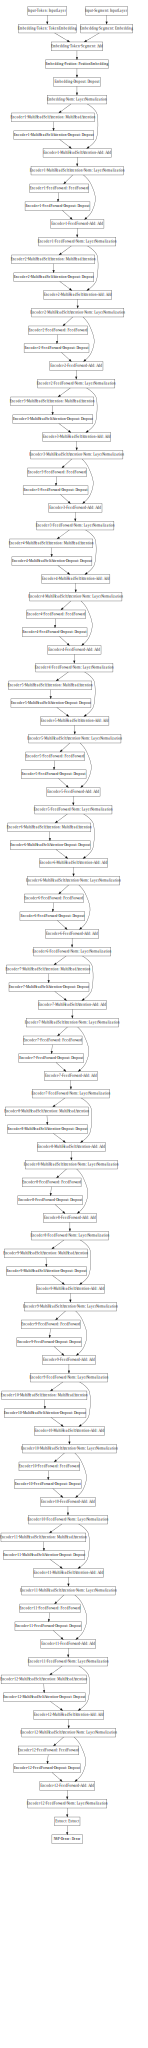

In [ ]:
SVG(model_to_dot(bert_feature, dpi=65).create(prog='dot', format='svg'))

마지막 부분을 보시면 768개의 피처가 반환되게 됩니다.

테스트 데이터의 피처들을 반환하고, TSNE 임베딩 플롯을 그려보도록 하겠습니다.

In [ ]:
  bert_weight_list = bert_feature.predict(test_set)

In [ ]:
bert_weight_list

array([[ 0.6768613 , -0.34577873, -0.44642594, ..., -0.46659446,
         0.4760487 ,  0.554863  ],
       [ 0.63960963, -0.21447237,  0.3751952 , ..., -0.75756145,
         0.54507357,  0.64565605],
       [ 0.6462688 , -0.22030291,  0.29965237, ..., -0.76921386,
         0.4767284 ,  0.5631936 ],
       ...,
       [ 0.6250664 , -0.18705241, -0.0571351 , ..., -0.67899805,
         0.45182475,  0.4458032 ],
       [-0.75391245,  0.4165041 ,  0.3838565 , ...,  0.37433255,
        -0.4284077 , -0.4931942 ],
       [ 0.418387  ,  0.01214304,  0.23017944, ..., -0.6176592 ,
         0.23473784,  0.35688388]], dtype=float32)

In [ ]:
labels = test['smishing']

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

마지막 768 차원을 PCA를 사용하여 256차원으로 줄여줍니다.
그 다음 TSNE 알고리즘을 활용하여 3차원으로 축소해 줍니다.
TSNE 알고리즘은 유사한 것끼리 클러스터를 만들어 주는 역할을 합니다.

bert 임베딩을 pickle 모듈을 활용하여 저장해 줍니다.  

추후 재사용에 쓸 예정입니다.

In [ ]:
with open(path+"/bertembedding.pkl", "wb") as f:
  pickle.dump(bert_embedded, f)

저장하였던 임베딩 파일을 로드합니다.

In [ ]:
with open(path+"/bertembedding.pkl", "rb") as f:
  bert_embedded = pickle.load(f)

3D로 그리기 위해 matplotlib 모듈들을 로드합니다.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    ids, segments = tokenizer.encode(data, max_len=SEQ_LEN)
    indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def smishing_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = bert_model.predict(data_x)
    predict_answer = np.round(np.ravel(predict), 0).item()
    
    if predict_answer == 0:
      print("정상 텍스트입니다.")
    elif predict_answer == 1:
      print("스미싱 텍스트입니다.")

In [ ]:
smishing_evaluation_predict("XXX 고객님 안녕하십니까?XXX은행XXX지점 XXX대리입니다.항상 저희 XXX XXX지점을 이용해 주셔서 감사합니다.오늘은 XXX은행에서 안전한 금융거래를 위하여 입출금내역을 무료로 제공해 드리는 어플에 대해서 소개해 드립니다.스마트폰 플레이스토어 앱스토어에서 XXX스타알림 어플을 다운로드 후 원하시는 계좌를 등록하시면 무료로 입출금 문자를 받아보실 수 있습니다.등록 시 XXX지점 직원추천 XXX 꼬옥 입력 부탁드립니다.문의사항 있으시면 연락 주시길 바라며 SMS입출금통지서비스가 가입되어 있는 계좌는 XXX스타알림가입시 기존 통지서비스는 해지됩니다.항상 건강 유의하시고 오늘도 즐거운 하루 되시길 바랍니다준법감시인 심의필 제535호(2017.07.14) 본 광고물의 유효기간 2017.12.31까지XXX은행XXX지점 XXX대리올림XX-XXX-XXX무료수신거부XXX-XXX-XXX은행XXX올림")

정상 텍스트입니다.


In [ ]:
smishing_evaluation_predict("(광고)한국 (XXX XXX)이글을 읽는데 2분의 시간만 투자하시면 많은 도움이 되실껍니다비싼 이자를 전환하고자 하시는 분매월 나가고있는 불입금을 줄이려고 하는분여러건을 사용중이고 통합을 원하시는 분적금및 보험을 늘려 빨리 돈을 모으고 싶으신분마지막으로 신용등급을 올리고자 하시는 분()내용을 하고자 하시는 분들 꼭 읽어보시고 연락을 주시면 저희가 모든 수단과 방법을 동원해 도움을 드릴것을 약속합니다XXX XXX 직장인 안내금리 연2.82%(CD금리변동)직장인기준(공무원외감업체대기업 우대)한도 1억4천만원까지일반업체개인사업장 근로자도 진행가능신용도와 상관없이 자체등급으로 판단이벤트기간10월 한정 금리인하 1%(소진시 까지)신청방법:문자로 상담 이라고 답장을 주시거나 전화를 주시면 정직하고 친절히 상담으로 도움드릴께요신용상담을 위한 신용조회는 등급에 영향을 미치지 않습니다.카카오톡 신청방법ID:citi61아이디검색후 친구추가후 상담이라는 카톡을 남겨주세요 빠르게 답변드리겠습니다.부채통합LOAN상품안내자격조건:사대보험가능한 직장인 and 재직 1년이상(1년미만도 직군과 등급에 따라 가능할 수 있습니다한도:연봉대비300%까지금리:최저 3%(등급 차등적용)(부채)통 합 상 품 의 요 약연소득대비 최대300%이내신용등급 7등급이내의 직장인이면카드론현금서비스 사용이 잦은 분들원리금균등방식을 이자만내는 방식으로 전환부채과다로인해 추가진행이 어렵다면 통합해드리겠습니다최근 6개월간 연체사실이 있다면 진행이 안됩니다신청방법:문자로 상담 이라고 답장을 주시거나 전화를 주시면 정직하고 친절히 상담으로 도움드릴께요XXX드림(햇)(살)(론)상품1.최저 3000만원까지2.최대 10%내외3.20%이상의 고금리를 6개월이상 사용하고 있는분신용에 대한 기본적인 상식과 지식을 알아야 하는 시대입니다. 최소한의 지식을 직접 알아야 금전적 손해를 보는 일이 없습니다건수 과다시-대출 건수를 줄이시면 신용등급이 상승합니다거치상품 만기-대출연장으로매월내시는 원리금을 줄일 수 있습니다.수신을 희망하지 않으시면 거부라는 답장 또는 하단부에 수신거부번호로 연락주시면 바로 조치하도록 하겠습니다.무료수신거XXX")

스미싱 텍스트입니다.


In [ ]:
smishing_evaluation_predict("영상미는 좋지만, 스토리와 연출이 너무너무 진부해서 하품100번하다 나왔네요..") 

정상 텍스트입니다.


In [ ]:
smishing_evaluation_predict("(광고) XXX항상 이용해주셔서 감사합니다2017년 중반기 정부지원 상품이 개편되어 안내드립니다.금년 낮은금리로 대출금 이용하실수 있는 마지XXX입니다.고민하지 마시고 전화주세요 항상 이용해주셔서 감사합니다(내용)무담보.신상품.출시안내본상품은 서민지원대출로 정부에서 지원하고 국민 은행에서 판매하는 대XXX입니다.상품특징1. 무담보! 무보증! 무수수료!2. 신용등급상관없이3. 최고한도 90004. 최하금리 4.2%5. 상환수수료 없이 자유롭게 상환가능!6. 기존대출 저금리전환가능자격조건1.만21세65세2.직장인사업자프리랜서주부학생3.최근부결자 다중채무자 가능신청기간9월15일마감.접수자가 많으니 빠른신청 바랍니다.신청방법본 문자수신번호로 전화 하셔서 1번 눌러주시면 접수완료신청자가 많아 상담이 지연될수 있습니다.양해부탁드립니다.무료수신거부XXX-XXX-XXX광고 XXX국")

스미싱 텍스트입니다.


In [1]:
smishing_evaluation_predict("(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신거부 목록에 등록을 시켜 두번 다시 발송되지 않도록 조치를 취해드리겠습니다.추가자금 이나 채무통합 상담안내 문자발송 하였습니다.XXX-XXX-XXX 담당:XXX팀장매우 바쁘신줄 알지만 3분만 시간을내주셔서 저의 글을 끝까지 읽어주시면 조금이나마 도움이 되실거라 판단되어 감히 글을 남깁니다.일전에 XXX금융 상담을 해드렸던 XXX 입니다.이런 연락들을 하루에도 몇번씩 받으실텐데 저까지 거들게되어 깊은 사과의 말씀부터 드리겠습니다.다름이 아니라 이번에 대출전문 컨설팅 회사로 이직을 했습니다.기존 XXX금융 근무할때는 세렉트론 한상품만 취급을 했지만이제는 전 금융권을 전부 가이드 해드릴수가 있기때문에 보다 나은 금융서비스를 제공해 드릴수가 있습니다.고객님 이용중이신 2금융권중 금리 높은 부분...추후 저금리추가자금채무통합기존정부상품1.햇살론새희망XXX드림론정부지원자금사잇돌보증재단 상품2.담보 아파트빌라상가건물토지등 상품 3.차량상품 또한 진행가능합니다 궁금한 사항 있으시면 언제든지 연락주시면 성심 성의껏 상담해 드리겠습니다.그리고 마지막으로 간혹 부채가 너무많이있으셔서 부채통합이 안되신다고 걱정을 하시는데 부채XXX 고객님 부채를 0 원으로 만들어 드린상태에서...이렇게 되면 당연히 등급한도가 최대로 살아나십니다.이런 상황에서 진행을 해드리는 부채통합 상품도 있으니 부채가 많으셔도 진행이 가능하십니다.부채통합 상품은 오히려 부채 많으신 분들이 이용하시는 상품입니다.위 내용중 하나라도 해당이 되시는분들은 언제든지 전화문자 연락주시면 정확한 상담을 해드리겠습니다.속는셈치고 연락한번 주시면 만족하실수 있도록 최선을 다하고 신뢰할수 있는 상담 도움드리겠습니다.많이 불편하셨다면 발신번호나 무료수신 거부 문자 주시면 수신거부 처리해드리겠습니다.불편하게 해드XXX 정말광고 XXX은행")

NameError: ignored

In [ ]:
smishing_evaluation_predict("XXX(광고)XXX Korea(XXX)비싼 이자를 전환하고자 하시는 분매월 나가고있는 불입금을 줄이려고 하는분여러건을 사용중이고 통합을 원하시는 분적금및 보험을 늘려 빨리 돈을 모으고 싶으신분마지막으로 신용등급을 올리고자 하시는 분()내용을 하고자 하시는 분들 꼭 읽어보시고 연락을 주시면 저희가 모든 수단과 방법을 동원해 도움을 드릴것을 약속합니다XXX XXX 직장인 안내금리 연2.82%(CD금리변동)직장인기준(공무원외감업체대기업 우대)한도 1억4천만원까지일반업체개인사업장 근로자도 진행가능신용도와 상관없이 자체등급으로 판단이벤트기간11월 한정 금리인하 1%(소진시 까지)신청방법:문자로 상담 이라고 답장을 주시거나 전화를 주시면 정직하고 친절히 상담으로 도움드릴께요신용상담을 위한 신용조회는 등급에 영향을 미치지 않습니다.카카오톡 신청방법ID:citi56아이디검색후 친구추가후 상담이라는 카톡을 남겨주세요 빠르게 답변드리겠습니다.부채통합LOAN상품안내자격조건:사대보험가능한 직장인 and 재직 1년이상(1년미만도 직군과 등급에 따라 가능할 수 있습니다한도:연봉대비300%까지금리:최저 3%(등급 차등적용)연소득대비 최대300%이내신용등급 7등급이내의 직장인이면카드론현금서비스 사용이 잦은 분들원리금균등방식을 이자만내는 방식으로 전환부채과다로인해 추가진행이 어렵다면 통합해드리겠습니다최근 6개월간 연체사실이 있다면 진행이 안됩니다신청방법:문자로 상담 이라고 답장을 주시거나 전화를 주시면 정직하고 친절히 상담으로 도움드릴께요XXX드림(햇)(살)(론)상품1.최저 3000만원까지2.최대 10%내외3.20%이상의 고금리를 6개월이상 사용하고 있는분신용에 대한 기본적인 상식과 지식을 알아야 하는 시대입니다. 최소한의 지식을 직접 알아야 금전적 손해를 보는 일이 없습니다건수 과다시-대출 건수를 줄이시면 신용등급이 상승합니다거치상품 만기-대출연장으로매월내시는 원리금을 줄일 수 있습니다.수신을 희망하지 않으시면 거부라는 답장 또는 하단부에 수신거부번호로 연락주시면 바로 조치하도록 하겠습니다.무료수신거부 XXX-XXX-XXXXXX")

스미싱 텍스트입니다.
